# Assigment 3: Kernels and SVMs

Juan Navarro, <jsnavarroa@unal.edu.co>

1.. Let $ x = \{x_1 , . . . , x_n \} $ be a subset of a input data set X. Consider a kernel function $ k : X×X → R $, which induces a feature space $ \phi(X) $:

(a) Deduce an expression, that allows to calculate the average distance to the center of mass
of the image of set x in the feature space (notice that the norm is **not** squared):

$$ \large \frac{1}{n} \sum_{i=1}^{n} {\Vert \phi(x_i ) − \phi_S(x) \Vert }_{\phi(X)} , $$

where the center of mass is defined as

$$ \large \phi_S(x) =  \frac{1}{n} \sum_{i=1}^{n} \phi(x_i ) $$

(b) Use the previous expression to calculate the average distance to the center of mass of
the following point set in R 2 , x = {(0, 1), (−1, 3), (2, 4), (3, −1), (−1, −2)}, in the feature
spaces induced by the following kernels:





i. k(x, y) = hx, yi

ii.k(x, y) = hx, yi 2

iii.k(x, y) = (hx, yi + 1) 5

iv. Gaussian kernel with σ = 1.

2.. Digit recognition model understanding.

(a) Get the data for the MNIST data set: http://scikit-learn.org/stable/datasets/index.html#downloading-datasets-from-the-mldata-org-repository.

In [83]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='./data/')

mnist.data.shape

(70000, 784)

(b) Normalize your features so that each one has mean 0 and standard deviation 1.

/home/juan/Programas/Miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


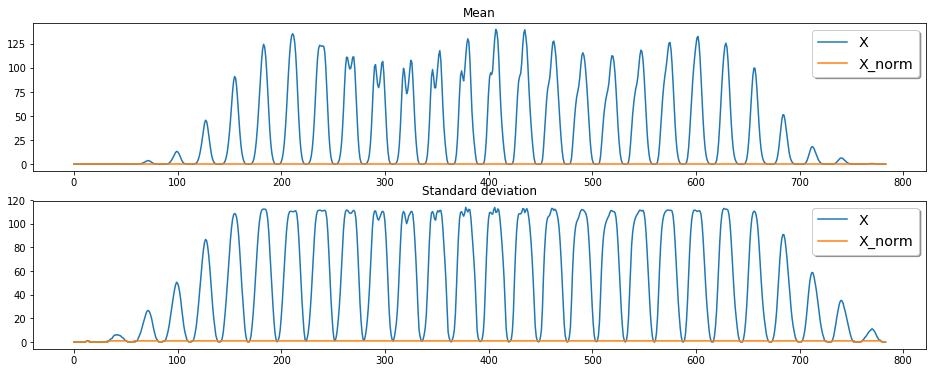

In [84]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

X = mnist.data
y = mnist.target


scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Plot the mean and standard deviation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6))

ax1.set_title('Mean')
ax1.plot(np.mean(X, axis=0), label='X')
ax1.plot(np.mean(X_norm, axis=0), label='X_norm')
ax1.legend(loc='upper right', shadow=True, fontsize='x-large')

ax2.set_title('Standard deviation')
ax2.plot(np.std(X, axis=0), label='X')
ax2.plot(np.std(X_norm, axis=0), label='X_norm')
ax2.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.show()

(c) Choose two classes (e.g. 1 and 0, or 6 and 9) and train a linear SVM to discriminate between them. Find an optimal complexity parameter, C, plotting the training and test error vs. the regularization parameter. Use a logarithmic scale for C, $ \{2^{−15} , 2^{−4} , . . . , 2^{10} \} $.
Discuss the results.

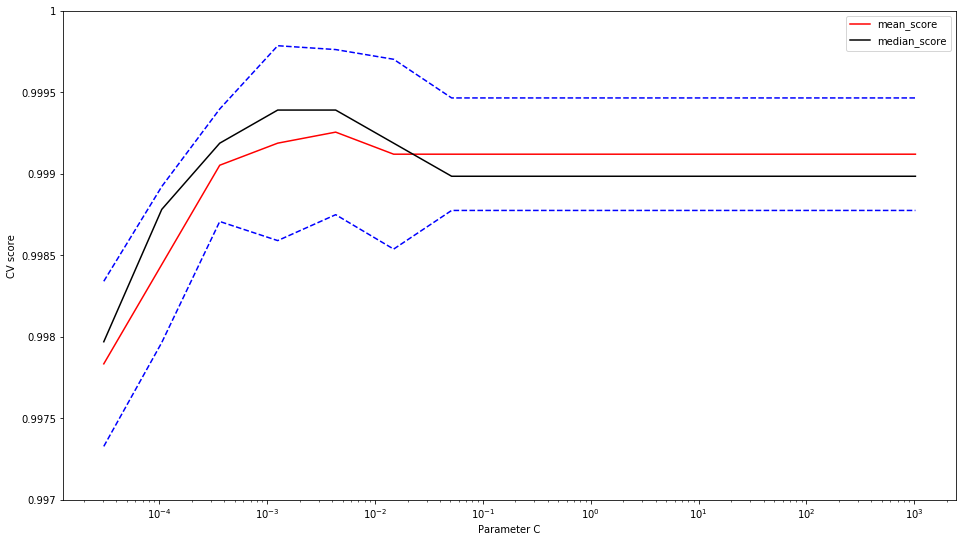

In [85]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm

# Get samples from 0 and 1 digits
ix = np.isin(y, [0, 1])
X_subset = X_norm[ix]
y_subset = y[ix]

# Create a classifier: a support vector classifier
classifier = svm.SVC(kernel='linear')

C_s = np.logspace(start=-15, stop=10, num=15, base=2)

scores = list()
scores_std = list()
scores_median = list()
for C in C_s:
    classifier.C = C
    this_scores = cross_val_score(classifier, X_subset, y_subset, n_jobs=-1)
    scores.append(np.mean(this_scores))
    scores_median.append(np.median(this_scores))
    scores_std.append(np.std(this_scores))

# Do the plotting
plt.figure(1, figsize=(16, 9))
plt.clf()
plt.semilogx(C_s, scores, 'r', label='mean_score')
plt.semilogx(C_s, np.array(scores_median), 'k', label='median_score')
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.legend()
plt.show()

(d) Extract the weights of the classification model found in (b).

(e) Plot the discriminant function weights as follows:

  i. Arrange the weights in a matrix with the same shape as the input image.
  
  ii. Use a function such as pcolor http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pcolor to produce a color plot of the matrix.iii. Use a diverging colormap that emphasizes negative and positive values http://matplotlib.org/examples/color/colormaps_reference.html.
  
  iv. Discuss the results.
  
(f) Play with different pairs of digits and with different values for the C parameter (smaller
values could produce smoother plots). Discuss the results.

3.. Train an SVM for detecting whether a word belongs to English or Spanish.
(a) Build training and test data sets. You can use the most frequent words in http://
en.wiktionary.org/wiki/Wiktionary:Frequency_lists. Consider words at least 4
characters long and ignore accents.
(b) Implement the kernel proposed by Lodhi et al. [1] as well as a kernel that counts the
number of common n-grams between two strings. Alternatively use the implementation
in https://github.com/muggin/string-kernels.
(c) Use scikit-learn to train different SVMs using precomputed kernels. Use cross valida-
tion to find appropriate regularization parameters. Try different configurations of the
parameters (λ and n).
(d) Evaluate the performance of the SVMs in the test data set:
i. Report the results in a table for the different evaluated configurations.
ii. Illustrate examples of errors (English words mistaken as Spanish, Spanish words
mistaken as English). Give a possible explanation for these mistakes.
iii. Discuss the results.

## References
[1] Lodhi, H., Saunders, C., Shawe-Taylor, J., Cristianini, N., & Watkins, C. (2002). Text classifi-
cation using string kernels. Journal of Machine Learning Research, 2(Feb), 419-444.